# Exploratory Data Analysis

In [7]:
# Review sample of data from all 4 classes of images in data folder
# This script is used to review the data and understand the data distribution

import os
import random

import matplotlib.pyplot as plt
import numpy as np

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = plt.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Load all images of all classes - chickenpox, measles, monkeypox and normal
chickenpox_images = load_images_from_folder('data/Chickenpox')
measles_images = load_images_from_folder('data/Measles')
monkeypox_images = load_images_from_folder('data/Monkeypox')
normal_images = load_images_from_folder('data/Normal')


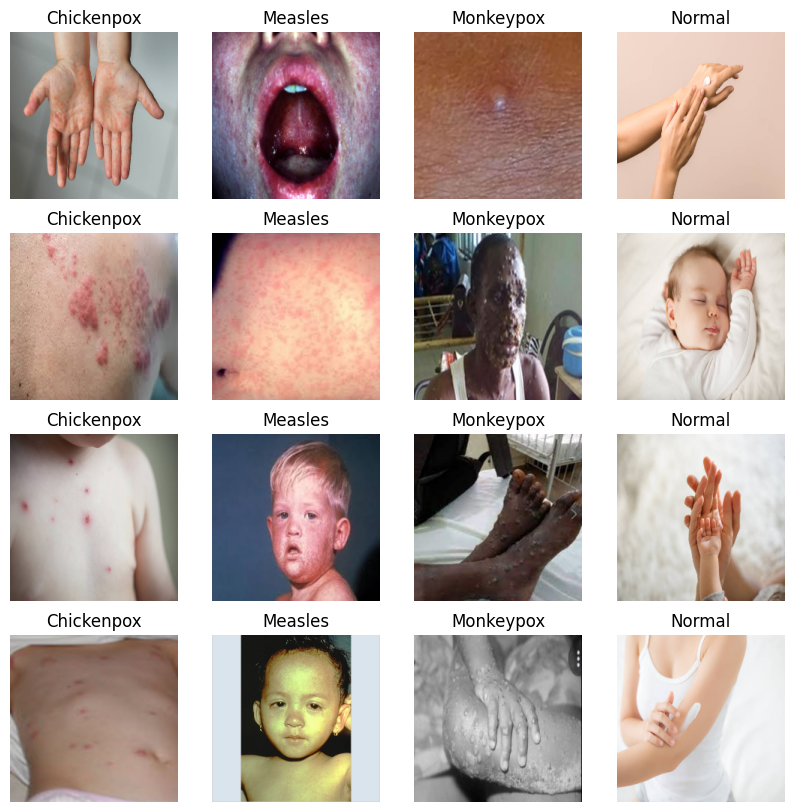

In [9]:
# Sample some of the images in 4 x 4 grid where each column refers to a class
# Also label the image with filename under the image

# Randomly sample 4 images from each class
chickenpox_sample = random.sample(chickenpox_images, 4)
measles_sample = random.sample(measles_images, 4)
monkeypox_sample = random.sample(monkeypox_images, 4)
normal_sample = random.sample(normal_images, 4)

fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i, img in enumerate(chickenpox_sample):
    axs[i, 0].imshow(img)
    axs[i, 0].axis('off')
    axs[i, 0].set_title('Chickenpox')
    
for i, img in enumerate(measles_sample):
    axs[i, 1].imshow(img)
    axs[i, 1].axis('off')
    axs[i, 1].set_title('Measles')
    
for i, img in enumerate(monkeypox_sample):
    axs[i, 2].imshow(img)
    axs[i, 2].axis('off')
    axs[i, 2].set_title('Monkeypox')

for i, img in enumerate(normal_sample):
    axs[i, 3].imshow(img)
    axs[i, 3].axis('off')
    axs[i, 3].set_title('Normal')



In [27]:
# Calculate the resolution of images in each class
chickenpox_resolutions = [img.shape for img in chickenpox_images]
measles_resolutions = [img.shape for img in measles_images]
monkeypox_resolutions = [img.shape for img in monkeypox_images]
normal_resolutions = [img.shape for img in normal_images]

# Check that all images have the same resolution
assert len(set(chickenpox_resolutions)) == 1
assert len(set(measles_resolutions)) == 1
assert len(set(monkeypox_resolutions)) == 1
assert len(set(normal_resolutions)) == 1

# Print the resolution of images in each class
print(f'Chickenpox resolution: {chickenpox_resolutions[0]}')
print(f'Measles resolution: {measles_resolutions[0]}')
print(f'Monkeypox resolution: {monkeypox_resolutions[0]}')
print(f'Normal resolution: {normal_resolutions[0]}')

plt.show()

Chickenpox resolution: (224, 224, 3)
Measles resolution: (224, 224, 3)
Monkeypox resolution: (224, 224, 3)
Normal resolution: (224, 224, 3)


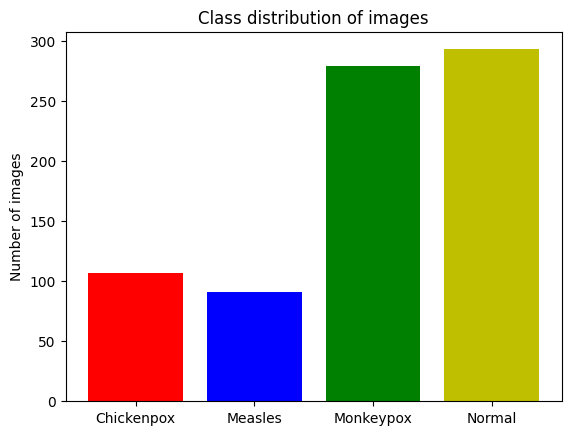

In [13]:
# Plot the class distribution based on the number of images
# Different colours for different plots

fig, ax = plt.subplots()
ax.bar('Chickenpox', len(chickenpox_images), color='r', label='Chickenpox')
ax.bar('Measles', len(measles_images), color='b', label='Measles')
ax.bar('Monkeypox', len(monkeypox_images), color='g', label='Monkeypox')
ax.bar('Normal', len(normal_images), color='y', label='Normal')

ax.set_ylabel('Number of images')
ax.set_title('Class distribution of images')

plt.show()



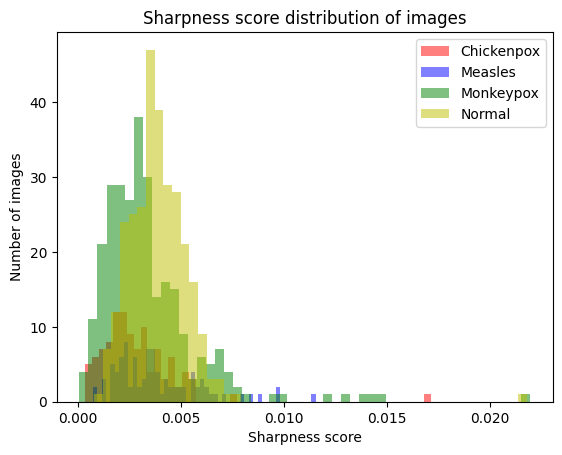

In [33]:
# Sobel edge detection analysis for all classes
# Sobel edge detection is used to detect edges in the image
# Our goal here is to calculate a sharpness score for each image in all classes
# Then find the mean sharpness score for each class
# Discard the images with sharpness score less than a threshold
# Find threshold based on 2 SD's from mean

from skimage import filters

def sharpness_score(image):
    return filters.sobel(image).var()

# Calculate sharpness score for all images in all classes
chickenpox_sharpness = [sharpness_score(img) for img in chickenpox_images]
measles_sharpness = [sharpness_score(img) for img in measles_images]
monkeypox_sharpness = [sharpness_score(img) for img in monkeypox_images]
normal_sharpness = [sharpness_score(img) for img in normal_images]

# Plot sharpnes score distribution for all classes
fig, ax = plt.subplots()
ax.hist(chickenpox_sharpness, bins=50, color='r', alpha=0.5, label='Chickenpox')
ax.hist(measles_sharpness, bins=50, color='b', alpha=0.5, label='Measles')
ax.hist(monkeypox_sharpness, bins=50, color='g', alpha=0.5, label='Monkeypox')
ax.hist(normal_sharpness, bins=50, color='y', alpha=0.5, label='Normal')

ax.set_ylabel('Number of images')
ax.set_xlabel('Sharpness score')
ax.set_title('Sharpness score distribution of images')
ax.legend()


Text(0.5, 1.0, 'Average sharpness score of images')

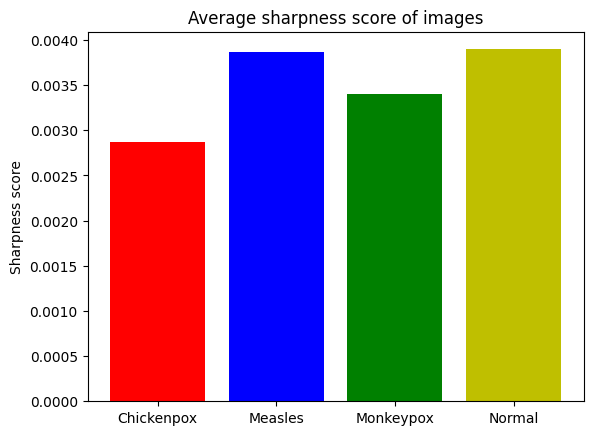

In [35]:
# Calculate the average sharpness score for each class
chickenpox_mean_sharpness = np.mean(chickenpox_sharpness)
measles_mean_sharpness = np.mean(measles_sharpness)
monkeypox_mean_sharpness = np.mean(monkeypox_sharpness)
normal_mean_sharpness = np.mean(normal_sharpness)

# Plot it out
fig, ax = plt.subplots()
ax.bar('Chickenpox', chickenpox_mean_sharpness, color='r', label='Chickenpox')
ax.bar('Measles', measles_mean_sharpness, color='b', label='Measles')
ax.bar('Monkeypox', monkeypox_mean_sharpness, color='g', label='Monkeypox')
ax.bar('Normal', normal_mean_sharpness, color='y', label='Normal')

ax.set_ylabel('Sharpness score')
ax.set_title('Average sharpness score of images')